<a href="https://colab.research.google.com/github/FabricioAMonteiro/FabricioAMonteiro/blob/main/Aula_de_Processamento_de_Linguagem_Natural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

resenha = pd.read_csv("/content/drive/MyDrive/imdb-reviews-pt-br.csv")
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [2]:
from sklearn.linear_model import LogisticRegression


In [4]:
classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])

In [5]:
resenha["classificacao"] = classificacao

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=True, strip_accents='ascii', 
    ngram_range=(1 , 2))
bag_of_words = vetorizar.fit_transform(texto)

In [7]:
vetorizar.get_feature_names_out()

array(['assisti', 'assisti um', 'filme', 'filme otimo', 'filme ruim',
       'otimo', 'ruim', 'um', 'um filme'], dtype=object)

In [8]:
bag_of_words

<2x9 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [9]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                      columns=vetorizar.get_feature_names_out())

In [10]:
matriz_esparsa

,assisti,assisti um,filme,filme otimo,filme ruim,otimo,ruim,um,um filme
0,1,1,1,1,0,1,0,1,1
1,1,1,1,0,1,0,1,1,1


In [11]:
vetorizar = CountVectorizer(lowercase=True, strip_accents='ascii', 
    ngram_range=(1 , 2))
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 2602819)


In [12]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              resenha["classificacao"],
                                                              random_state = 42, stratify=resenha["classificacao"])

In [13]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=True, strip_accents='ascii', 
    ngram_range=(1 , 2))
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressao_logistica = LogisticRegression(solver = "lbfgs", max_iter=1000)
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)
print(classificar_texto(resenha, "text_pt", "classificacao"))


0.9013344116457743


In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
todas_palavras = ' '.join([texto for texto in resenha.text_pt])

nuvem_palvras = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False, max_words=100).generate(todas_palavras)

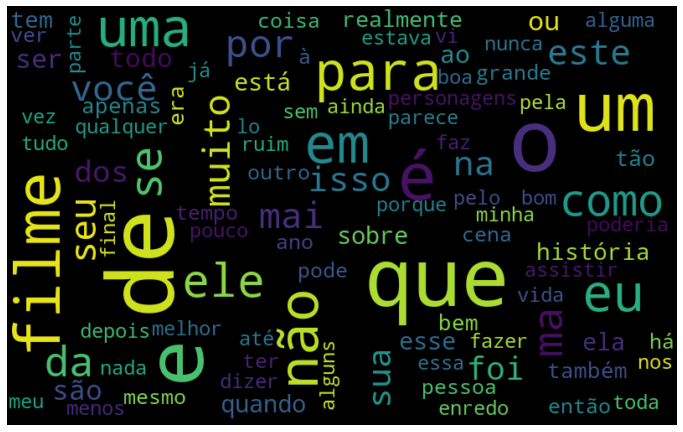

In [15]:
plt.figure(figsize=(12,8))
plt.imshow(nuvem_palvras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False, max_words=100).generate(todas_palavras)
    plt.figure(figsize=(12,8))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [17]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False, max_words=100).generate(todas_palavras)
    plt.figure(figsize=(12,8))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

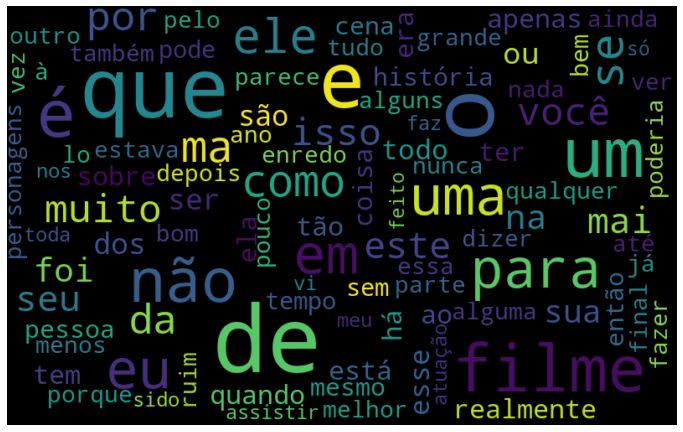

In [18]:
nuvem_palavras_neg(resenha, "text_pt")

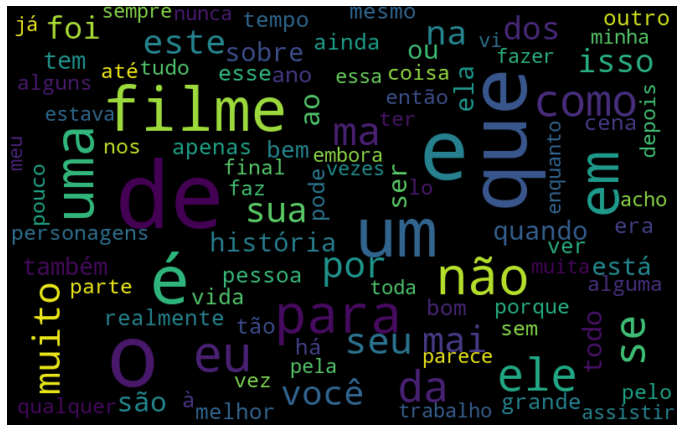

In [19]:
nuvem_palavras_pos(resenha, "text_pt")

In [20]:
import nltk 
frase = ["um filme bom", "um filme ruim"]
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [22]:
from nltk import tokenize

frase = "Bem vindo ao mundo do PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


In [23]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})

In [24]:
df_frequencia.nlargest(columns = "Frequência", n = 10)

,Palavra,Frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


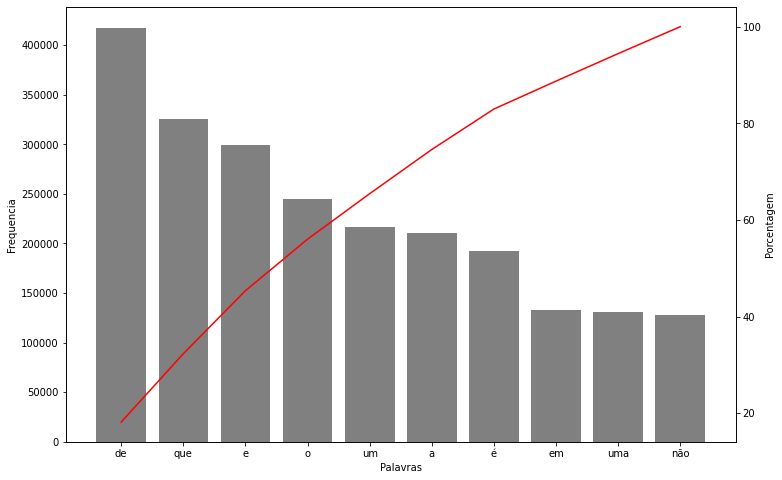

In [25]:
import seaborn as sns
    
def pareto(texto, coluna_texto, quantidade):
  todas_palavras = ' '.join([resenha for resenha in texto[coluna_texto]])
  token_espaco = nltk.tokenize.WhitespaceTokenizer()
  token_frase = token_espaco.tokenize(todas_palavras)
  frequencias = nltk.FreqDist(token_frase)
  df_frequencias = pd.DataFrame({'Palavras': list(frequencias.keys()),
                               'Frequencia': list(frequencias.values())})
  df_frequencias = df_frequencias.nlargest(n=quantidade, columns='Frequencia')

  total = df_frequencias['Frequencia'].sum()
  df_frequencias['Porcentagem'] = df_frequencias['Frequencia'].cumsum() / total * 100

  plt.figure(figsize=(12,8))
  ax = sns.barplot(data=df_frequencias, x='Palavras', y='Frequencia', color='gray')
  ax2 = ax.twinx()
  sns.lineplot(data=df_frequencias, x='Palavras', y='Porcentagem', color='red', sort=False, ax=ax2)
  plt.show()



pareto(resenha, "text_pt", 10)


In [26]:
import nltk
nltk.download('stopwords')
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_1"] = frase_processada



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [28]:
classificar_texto(resenha, "tratamento_1", "classificacao")

0.8954306510311363

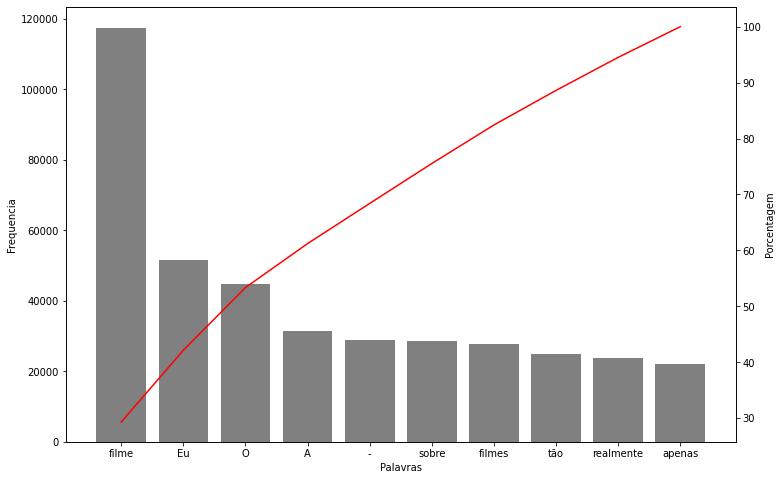

In [29]:
pareto(resenha,"tratamento_1", 10)

In [30]:
from nltk import tokenize

frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['Olá', 'mundo', '!']


In [31]:
from string import punctuation

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in resenha["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_2"] = frase_processada

In [32]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [33]:
resenha["tratamento_1"][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [34]:
resenha["tratamento_2"][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

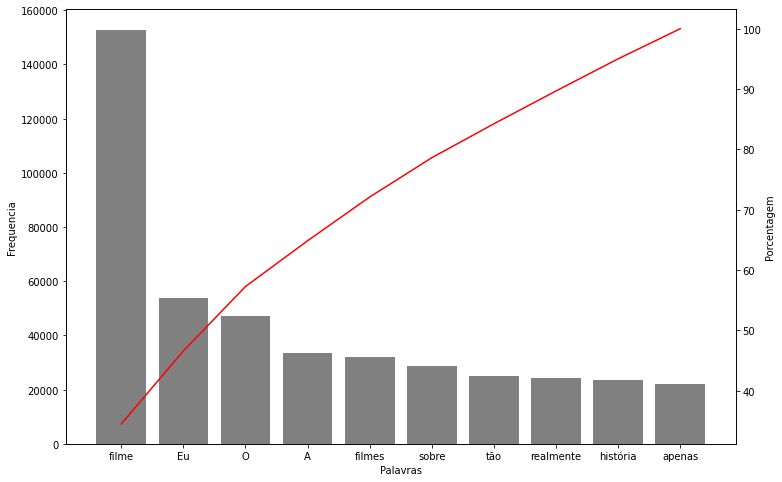

In [35]:
pareto(resenha, "tratamento_2", 10)

In [37]:
!pip install Unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 7.3 MB/s 


In [38]:
import unidecode

acentos = "ótimo péssimo não é tão"

teste = unidecode.unidecode(acentos)
print(teste)

otimo pessimo nao e tao


In [39]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]

In [40]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [41]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [42]:
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja

In [43]:
resenha["tratamento_3"] = sem_acentos

frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_3"] = frase_processada

In [44]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [45]:
acuracia_tratamento3 = classificar_texto(resenha, "tratamento_3", "classificacao")
print(acuracia_tratamento3)

0.8958350181965224


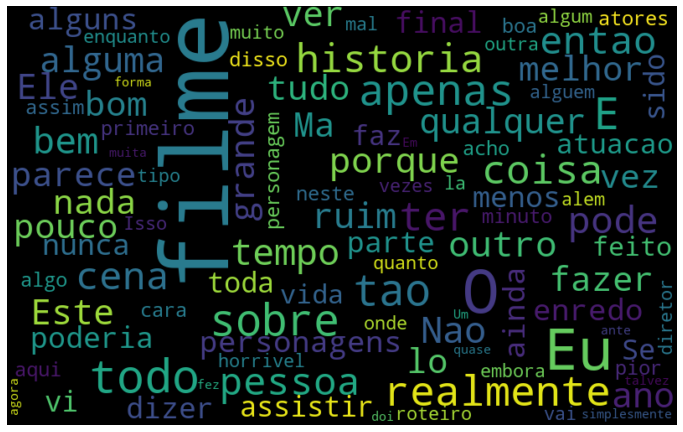

In [46]:
nuvem_palavras_neg(resenha, "tratamento_3")

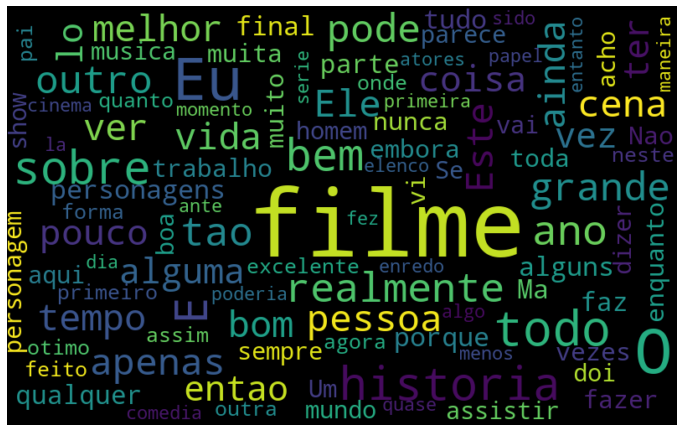

In [47]:
nuvem_palavras_pos(resenha, "tratamento_3")

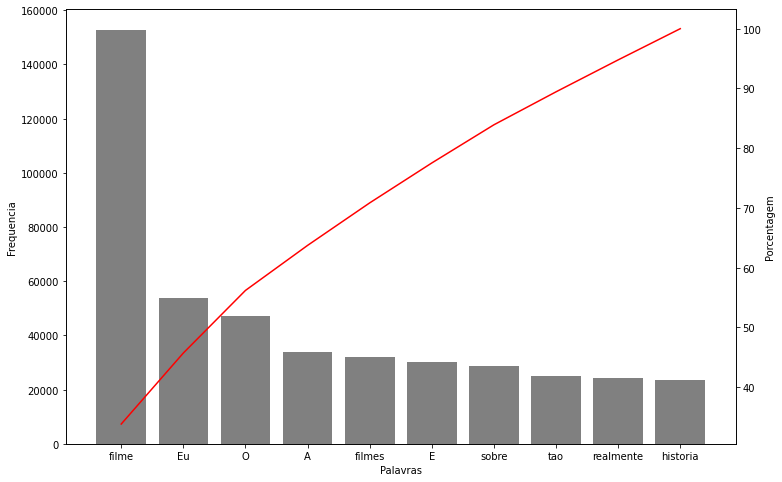

In [48]:
pareto(resenha, "tratamento_3", 10)

In [49]:
frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_4"] = frase_processada

In [50]:
acuracia_tratamento4 = classificar_texto(resenha, "tratamento_4", "classificacao")
print(acuracia_tratamento4)
print(acuracia_tratamento3)

0.8951071572988273
0.8958350181965224


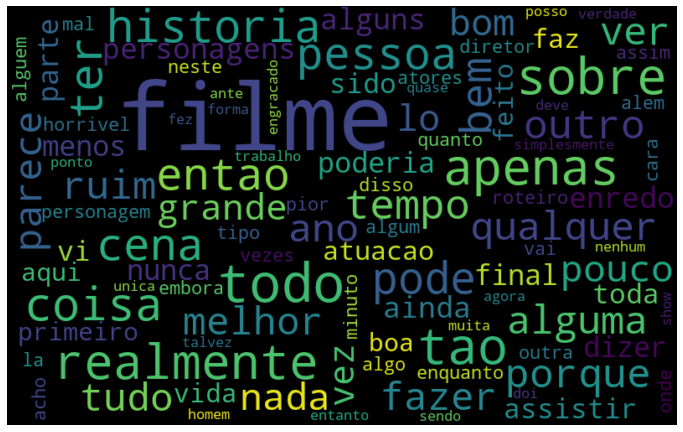

In [51]:
nuvem_palavras_neg(resenha, "tratamento_4")

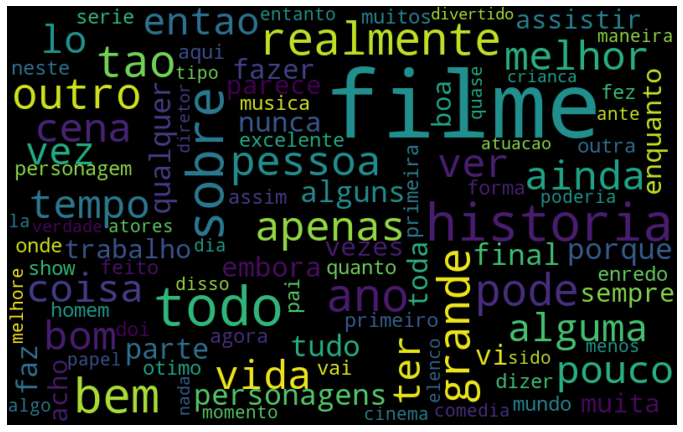

In [52]:
nuvem_palavras_pos(resenha, "tratamento_4")

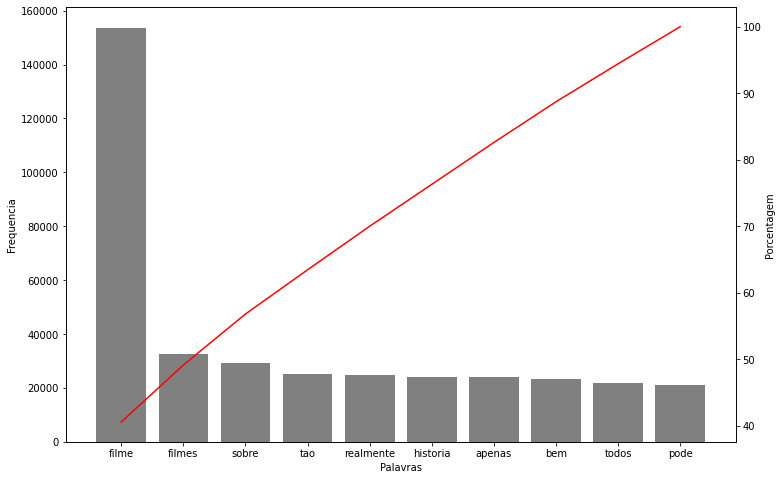

In [53]:
pareto(resenha, "tratamento_4", 10)

In [55]:
nltk.download('rslp')
stemmer = nltk.RSLPStemmer()
stemmer.stem("correria")

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


'corr'

In [56]:
frase_processada = list()
for opiniao in resenha["tratamento_4"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_5"] = frase_processada

In [57]:
acuracia_tratamento5 = classificar_texto(resenha, "tratamento_5", "classificacao")
print(acuracia_tratamento5)
print(acuracia_tratamento4)

0.8924383340072786
0.8951071572988273


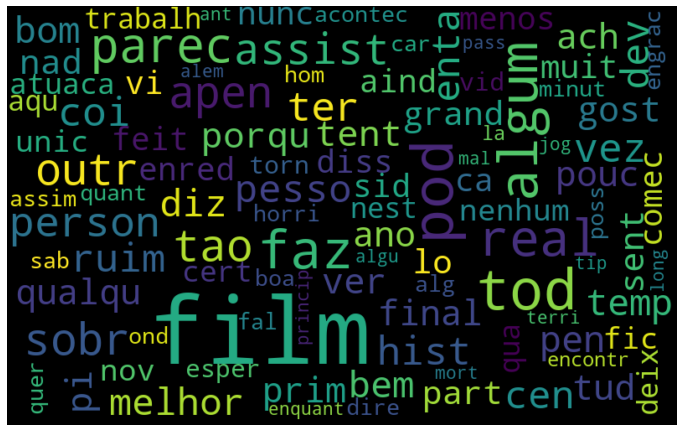

In [60]:
nuvem_palavras_neg(resenha, "tratamento_5")

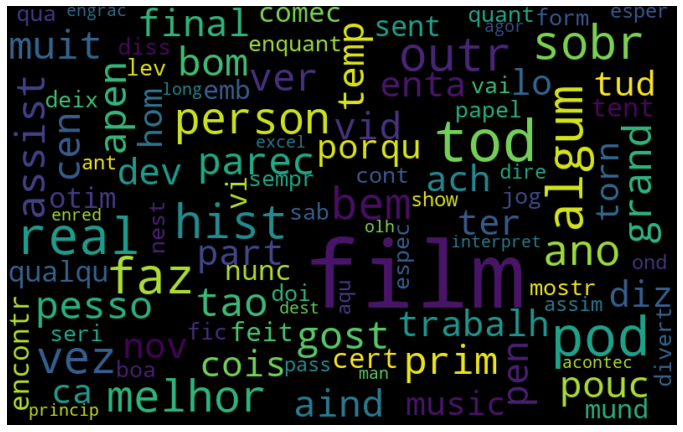

In [61]:
nuvem_palavras_pos(resenha,"tratamento_5")

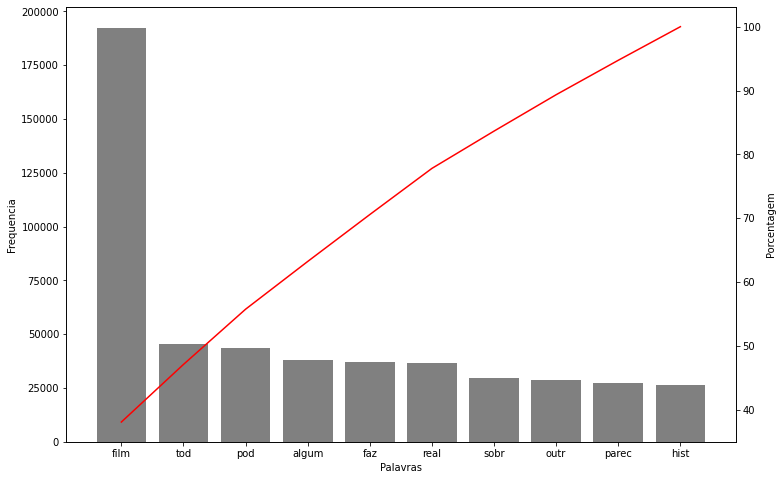

In [62]:
pareto(resenha, "tratamento_5", 10)

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Assisti um filme ótimo", "Assisti um filme péssimo"]

tfidf = TfidfVectorizer(lowercase=True, strip_accents='ascii', 
    ngram_range=(1 , 2))

caracteristicas = tfidf.fit_transform(frases)
pd.DataFrame(
    caracteristicas.todense(),
    columns=tfidf.get_feature_names_out()
)

,assisti,assisti um,filme,filme otimo,filme pessimo,otimo,pessimo,um,um filme
0,0.334251,0.334251,0.334251,0.469778,0.000000,0.469778,0.000000,0.334251,0.334251
1,0.334251,0.334251,0.334251,0.000000,0.469778,0.000000,0.469778,0.334251,0.334251


In [67]:
tfidf_bruto = tfidf.fit_transform(resenha["text_pt"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto,
                                                              resenha["classificacao"],
                                                              random_state = 42, stratify=resenha["classificacao"])
regressao_logistica = LogisticRegression(solver = "lbfgs", max_iter=1000)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_bruto)

0.890497371613425


In [68]:
tfidf_tratados = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados,
                                                              resenha["classificacao"],
                                                              random_state = 42, stratify=resenha["classificacao"])
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_tratados)

0.8876668014557217


In [69]:
print(acuracia_tratamento5)

0.8924383340072786


In [70]:
from nltk import ngrams

frase = "Assisti um ótimo filme."
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [71]:
tfidf_ngrams = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf_ngrams.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)


0.8856449656287909


In [72]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf)


0.8847553578649414


In [75]:
len(tfidf_ngrams.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


2427278

In [80]:
tfidf_ngrams.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '00 00',
 '00 01',
 '00 08',
 '00 10',
 '00 19',
 '00 1991',
 '00 20',
 '00 500',
 '00 80',
 '00 90',
 '00 absolut',
 '00 acorn',
 '00 ador',
 '00 agent',
 '00 aind',
 '00 alison',
 '00 alug',
 '00 ano',
 '00 apen',
 '00 banc',
 '00 bbc',
 '00 bem',
 '00 blockbust',
 '00 brev',
 '00 cad',
 '00 canal',
 '00 centr',
 '00 cert',
 '00 cinemax',
 '00 coloqu',
 '00 compr',
 '00 cop',
 '00 cort',
 '00 cust',
 '00 dalton',
 '00 decid',
 '00 deix',
 '00 der',
 '00 desd',
 '00 dia',
 '00 diam',
 '00 dinh',
 '00 diss',
 '00 diz',
 '00 dm',
 '00 doc',
 '00 dol',
 '00 doming',
 '00 dur',
 '00 dvd',
 '00 egipci',
 '00 enta',
 '00 entant',
 '00 entr',
 '00 entretant',
 '00 est',
 '00 faz',
 '00 fech',
 '00 fez',
 '00 fic',
 '00 film',
 '00 final',
 '00 gast',
 '00 geral',
 '00 giggl',
 '00 hilari',
 '00 hoj',
 '00 hor',
 '00 inclu',
 '00 infl',
 '00 ingress',
 '00 keon',
 '00 lb',
 '00 libr',
 '00 lo',
 '00 local',
 '00 loj',
 '00 manh',
 '00 mart',
 '00 masc',
 '00 mdt',
 '00 me',
 '00 med',

In [78]:
regressao_logistica.coef_[0]

array([ 0.18462311, -0.25079494,  0.        , ...,  0.        ,
       -0.0025257 , -0.0025257 ])

In [79]:
len(regressao_logistica.coef_[0])

69020